In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [36]:
dat=pd.read_excel('C:/YellowBelt/Boilers.xlsx')

boiler_1=dat['Boiler_1']
boiler_2=dat['Boiler_2']
boiler_3=dat['Boiler_3']

In [37]:
def check_non_numeric(df)->str:
    
    ''' checking if the DataFrame contains string values'''
    
    ss=list(df[df.apply(lambda x: isinstance(x,str))].unique())
    return ss

In [38]:
ss_1=check_non_numeric(boiler_1)
ss_1

['No Data']

In [39]:
ss_2=check_non_numeric(boiler_2)
ss_2

[]

In [40]:
ss_3=check_non_numeric(boiler_3)
ss_3

[]

How many non numeric data do we have?

In [41]:
percent_of_strings=len(boiler_1[boiler_1==ss_1[0]])/len(boiler_1)*100
print(np.round(percent_of_strings,2),'%')

1.1 %


In [42]:
boiler_1=boiler_1[boiler_1!=ss_1[0]]
ss_=check_non_numeric(boiler_1)
ss_

[]

In [43]:
def histogram_plotting(df,title,n_bins=35):
    
    ''' plotting histograms for boilers'''
    
    fig=plt.figure(figsize=(10,7))
    ax=fig.add_subplot(111)
    ax.hist(df,bins=n_bins,edgecolor='black',facecolor='blue')
    ax.set_title(title)
    ax.set_xlabel('t/h')
    ax.set_ylabel('hours')
    ax.grid(True)

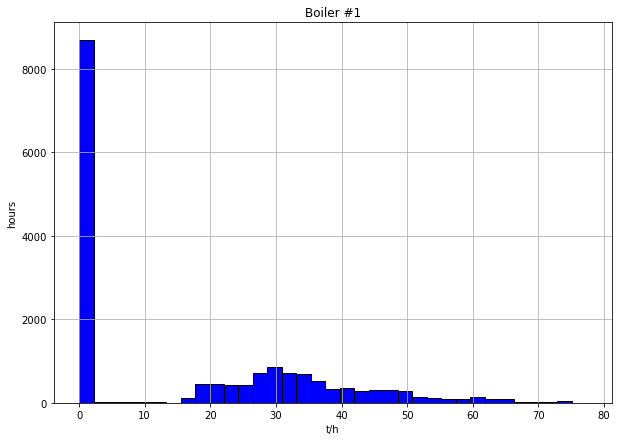

In [44]:
histogram_plotting(boiler_1,title='Boiler #1')

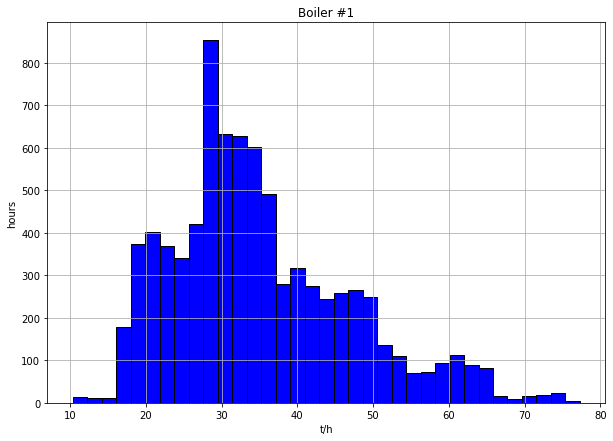

In [45]:
boiler_1=boiler_1[boiler_1>10]
histogram_plotting(boiler_1,title='Boiler #1')

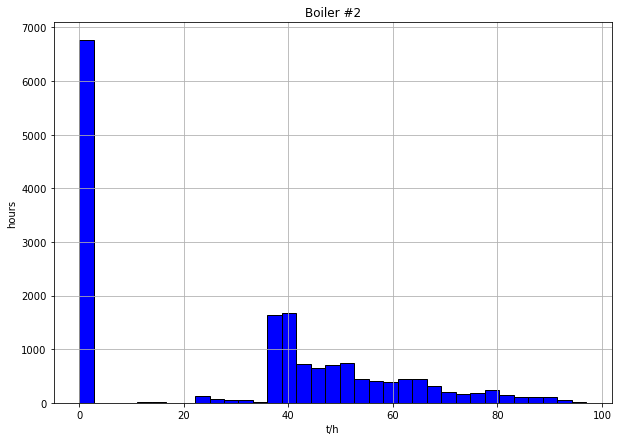

In [46]:
histogram_plotting(boiler_2,title='Boiler #2')

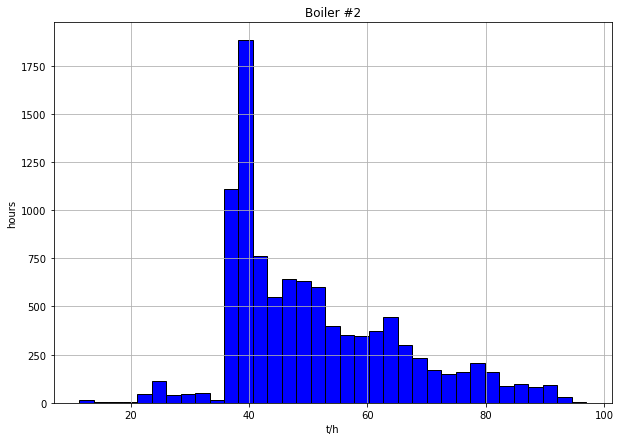

In [47]:
boiler_2=boiler_2[boiler_2>10]
histogram_plotting(boiler_2,title='Boiler #2')

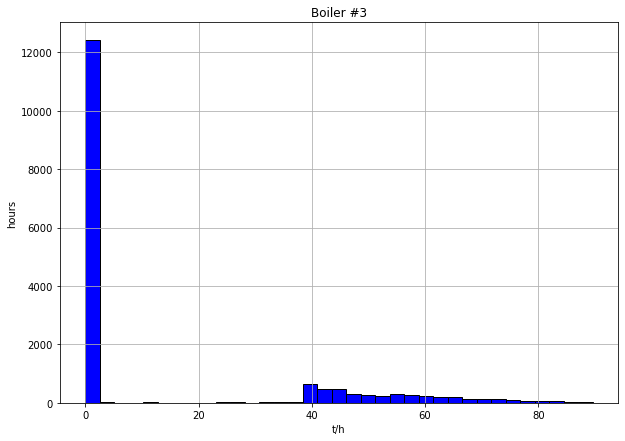

In [48]:
histogram_plotting(boiler_3,title='Boiler #3')

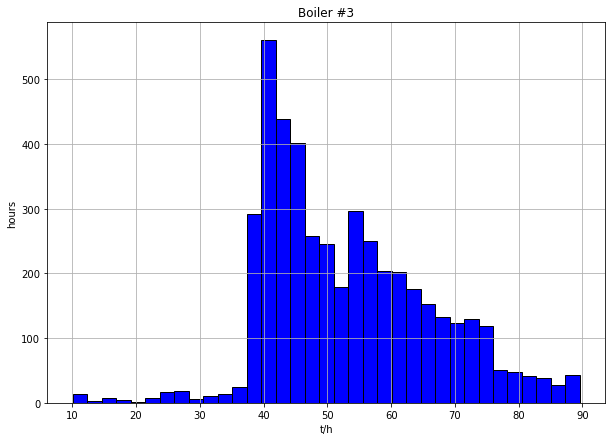

In [49]:
boiler_3=boiler_3[boiler_3>10]
histogram_plotting(boiler_3,title='Boiler #3')

In [50]:
dat=dat[dat['Boiler_1']!=ss_1[0]]
dat.head()

,Timestamp,Boiler_1,Boiler_2,Boiler_3
0,2019-01-01 00:00:00,18.4338,0.0,37.619465
1,2019-01-01 01:00:00,17.7973,0.0,35.497243
2,2019-01-01 02:00:00,28.2488,0.0,54.918937
3,2019-01-01 03:00:00,28.9773,0.0,62.865282
4,2019-01-01 04:00:00,27.2499,0.0,61.070492


In [51]:
dat=dat.set_index('Timestamp')
dat['total_productivity']=dat.sum(axis=1)
dat.head()

,Boiler_1,Boiler_2,Boiler_3,total_productivity
Timestamp,,,,
2019-01-01 00:00:00,18.4338,0.0,37.619465,56.053303
2019-01-01 01:00:00,17.7973,0.0,35.497243,53.294564
2019-01-01 02:00:00,28.2488,0.0,54.918937,83.167784
2019-01-01 03:00:00,28.9773,0.0,62.865282,91.842585
2019-01-01 04:00:00,27.2499,0.0,61.070492,88.320384


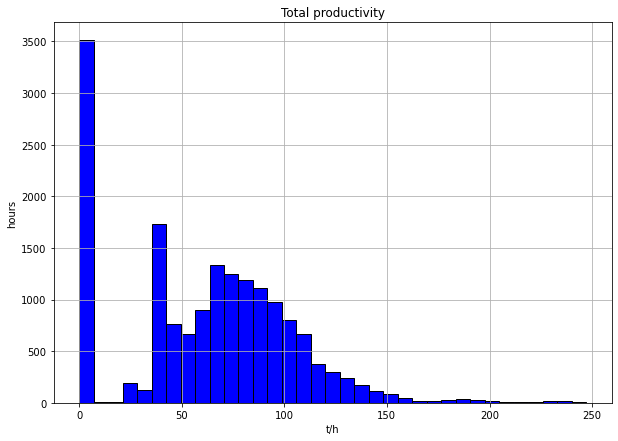

In [52]:
histogram_plotting(dat['total_productivity'],title='Total productivity')

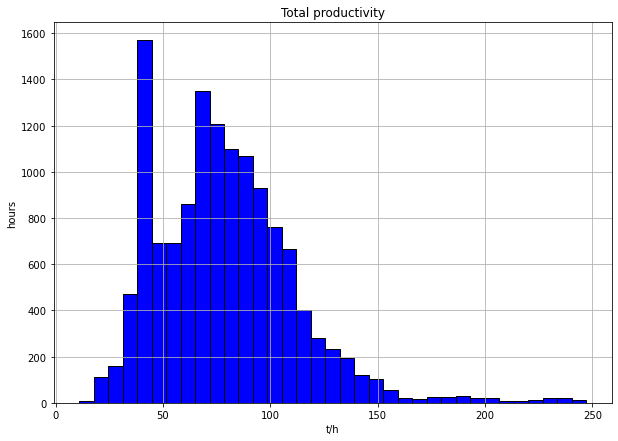

In [54]:
dat=dat[dat['total_productivity']>10]
histogram_plotting(dat['total_productivity'],title='Total productivity')